In [1]:
import model
import torch
import torch.nn as nn

In [2]:
net = model.Segmentator()

In [3]:
rand_im = torch.rand((16, 3, 64, 64))

In [4]:
print(net.toggle_debug())

True


In [5]:
output = net(rand_im)

In [6]:
import matplotlib.pyplot as plt

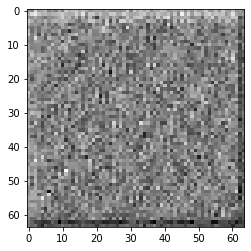

In [7]:
plt.imshow(output[0].detach(), cmap="gray")
plt.show()

In [14]:
loss = nn.BCELoss(reduction='none')

In [23]:
A = torch.zeros((10, 100, 100))
B = torch.zeros_like(A)+0.005


In [26]:
torch.mean(loss(A, B))

tensor(0.5000)